In [2]:
import gc
import os
import time
import warnings
from collections import Counter
import sqlite3

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import wordcloud
from tqdm import tqdm

import dash
from dash.dependencies import Input, Output
import plotly
import plotly.graph_objs as go

warnings.filterwarnings('ignore')
tqdm.pandas()
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', -1)

In [3]:
BASE_PATH = 'C:\\Projects\\Python_projects\\Covid19_Analysis\\twitter_db'

In [4]:
csv_list = os.listdir(f'{BASE_PATH}\\kaggle_data')
csv_list

['COVID19_line_list_data.csv',
 'COVID19_open_line_list.csv',
 'covid_19_data.csv',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_deaths_US.csv',
 'time_series_covid_19_recovered.csv']

In [47]:
covid_data = pd.read_csv(f"{BASE_PATH}\\kaggle_data\\covid_19_data.csv")

In [48]:
covid_data.shape, covid_data.columns

((11614, 8),
 Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
        'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
       dtype='object'))

In [49]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [50]:
covid_data["ObservationDate"] = pd.to_datetime(covid_data["ObservationDate"])
covid_data["Last Update"] = pd.to_datetime(covid_data["Last Update"])

In [51]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614 entries, 0 to 11613
Data columns (total 8 columns):
SNo                11614 non-null int64
ObservationDate    11614 non-null datetime64[ns]
Province/State     6128 non-null object
Country/Region     11614 non-null object
Last Update        11614 non-null datetime64[ns]
Confirmed          11614 non-null float64
Deaths             11614 non-null float64
Recovered          11614 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 726.0+ KB


In [52]:
cl_list = [k for k, _ in Counter(covid_data["Country/Region"]).most_common(150)]

In [53]:
cl_list[0]

'US'

In [62]:
dff =covid_data.groupby("ObservationDate").agg({"Confirmed":"sum", "Deaths": "sum", "Recovered": "sum"}).reset_index()

In [72]:
ma = {"a":1, "b":2, "c":3}
pd.DataFrame(ma, index=[0])

,a,b,c
0,1,2,3


In [64]:
dff.tail()

,ObservationDate,Confirmed,Deaths,Recovered
68,2020-03-30,782365.0,37582.0,164566.0
69,2020-03-31,857487.0,42107.0,178034.0
70,2020-04-01,932605.0,46809.0,193177.0
71,2020-04-02,1013157.0,52983.0,210263.0
72,2020-04-03,1095917.0,58787.0,225796.0


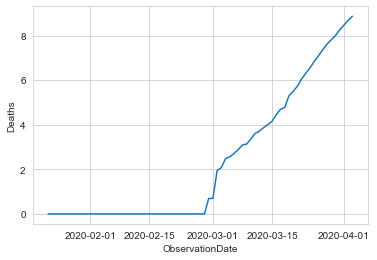

In [44]:
sns.lineplot(x=dff["ObservationDate"], y=np.log1p(dff["Deaths"]))

In [76]:
int(dff.iloc[-1,1])

1095917.0

## SQL df

In [26]:
conn = sqlite3.connect(
                f"{BASE_PATH}//twitter_data.db",
                isolation_level=None,
                check_same_thread=False
            )

In [27]:
df = pd.read_sql(f"SELECT * FROM covid ORDER BY id DESC LIMIT 20", conn)

In [28]:
df.head(4)

,id,id_str,tweet,created_at,user_location,user_name,screen_name,verified,sentiment
0,286,1246343447126183936,"Covid-19 to cut Asian growth to 2.2%, Thailand -4.8% (ADB) - https://t.co/HF2goCmpy0...",Sat Apr 04 07:46:48 +0000 2020,Cambodia,Cambodia Property,cambodia_home,0,0.0
1,285,1246343447151144960,Saturday feels like an extended weekday?\nJazz up your playlist.\n\n#HereForYou #COVID19 #WorkFromHome #SocialDistancing,Sat Apr 04 07:46:48 +0000 2020,,Select CITYWALK,SelectCITYWALK,1,0.0
2,284,1246343447084068865,@vivekagnihotri Sir retweet,Sat Apr 04 07:46:48 +0000 2020,,Krishna Chandra Mishra,Krishna42696556,0,0.0
3,283,1246343446958399488,"Top story: Coronavirus Australia: Qantas and Jetstar confirm around 50 staff infected with COVID-19 | https://t.co/SWomtpkscI https://t.co/Cbul9sACti, see more https://t.co/63wUhmQ85W",Sat Apr 04 07:46:48 +0000 2020,"Melbourne, Victoria",Samy Angel,SamyAngel4o,0,0.5


# Chloropeth graphs

In [5]:
covid_data = pd.read_csv(f"{BASE_PATH}\\kaggle_data\\covid_19_data.csv")

In [6]:
covid_data["ObservationDate"] = pd.to_datetime(covid_data["ObservationDate"])
covid_data["Last Update"] = pd.to_datetime(covid_data["Last Update"])

In [7]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [8]:
covid_data[covid_data["Country/Region"]=="India"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,2020-01-30,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,2020-01-31,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,2020-02-01,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,2020-02-02,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,2020-02-03,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12004,12005,2020-04-05,NaN,India,2020-04-05 23:13:44,3588.0,99.0,229.0
12323,12324,2020-04-06,NaN,India,2020-04-06 09:37:00,4778.0,136.0,375.0
12643,12644,2020-04-07,NaN,India,2020-04-07 23:11:31,5311.0,150.0,421.0
12963,12964,2020-04-08,NaN,India,2020-04-08 22:59:00,5916.0,178.0,506.0


In [9]:
CC ={'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'American Samoa': 'AS',
 'Andorra': 'AD',
 'Angola': 'AO',
 'Anguilla': 'AI',
 'Antarctica': 'AQ',
 'Antigua and Barbuda': 'AG',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Aruba': 'AW',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahamas': 'BS',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Barbados': 'BB',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Belize': 'BZ',
 'Benin': 'BJ',
 'Bermuda': 'BM',
 'Bhutan': 'BT',
 'Bolivia, Plurinational State of': 'BO',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Bouvet Island': 'BV',
 'Brazil': 'BR',
 'British Indian Ocean Territory': 'IO',
 'Brunei Darussalam': 'BN',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Cayman Islands': 'KY',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'Mainland China': 'CN',
 'Christmas Island': 'CX',
 'Cocos (Keeling) Islands': 'CC',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Congo': 'CG',
 'Congo, the Democratic Republic of the': 'CD',
 'Cook Islands': 'CK',
 'Costa Rica': 'CR',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Curaçao': 'CW',
 'Cyprus': 'CY',
 'Czech Republic': 'CZ',
 "Côte d'Ivoire": 'CI',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominica': 'DM',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Falkland Islands (Malvinas)': 'FK',
 'Faroe Islands': 'FO',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'French Guiana': 'GF',
 'French Polynesia': 'PF',
 'French Southern Territories': 'TF',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Gibraltar': 'GI',
 'Greece': 'GR',
 'Greenland': 'GL',
 'Grenada': 'GD',
 'Guadeloupe': 'GP',
 'Guam': 'GU',
 'Guatemala': 'GT',
 'Guernsey': 'GG',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Heard Island and McDonald Islands': 'HM',
 'Holy See (Vatican City State)': 'VA',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hungary': 'HU',
 'ISO 3166-2:GB': '(.uk)',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran, Islamic Republic of': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Isle of Man': 'IM',
 'Israel': 'IL',
 'Italy': 'IT',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jersey': 'JE',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Kiribati': 'KI',
 "Korea, Democratic People's Republic of": 'KP',
 'South Korea': 'KR',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 "Lao People's Democratic Republic": 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Liechtenstein': 'LI',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macau': 'MO',
 'Macedonia, the former Yugoslav Republic of': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Maldives': 'MV',
 'Mali': 'ML',
 'Malta': 'MT',
 'Marshall Islands': 'MH',
 'Martinique': 'MQ',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mayotte': 'YT',
 'Mexico': 'MX',
 'Micronesia, Federated States of': 'FM',
 'Moldova, Republic of': 'MD',
 'Monaco': 'MC',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Montserrat': 'MS',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nauru': 'NR',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Caledonia': 'NC',
 'New Zealand': 'NZ',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'Niue': 'NU',
 'Norfolk Island': 'NF',
 'Northern Mariana Islands': 'MP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palau': 'PW',
 'Palestine, State of': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Pitcairn': 'PN',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Puerto Rico': 'PR',
 'Qatar': 'QA',
 'Romania': 'RO',
 'Russia': 'RU',
 'Rwanda': 'RW',
 'Réunion': 'RE',
 'Saint Barthélemy': 'BL',
 'Saint Helena, Ascension and Tristan da Cunha': 'SH',
 'Saint Kitts and Nevis': 'KN',
 'Saint Lucia': 'LC',
 'Saint Martin (French part)': 'MF',
 'Saint Pierre and Miquelon': 'PM',
 'Saint Vincent and the Grenadines': 'VC',
 'Samoa': 'WS',
 'San Marino': 'SM',
 'Sao Tome and Principe': 'ST',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Seychelles': 'SC',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Sint Maarten (Dutch part)': 'SX',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'Solomon Islands': 'SB',
 'Somalia': 'SO',
 'South Africa': 'ZA',
 'South Georgia and the South Sandwich Islands': 'GS',
 'South Sudan': 'SS',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Svalbard and Jan Mayen': 'SJ',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syria': 'SY',
 'Taiwan': 'TW',
 'Tajikistan': 'TJ',
 'Tanzania': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Tokelau': 'TK',
 'Tonga': 'TO',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Turks and Caicos Islands': 'TC',
 'Tuvalu': 'TV',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'UK': 'GB',
 'US': 'US',
 'United States Minor Outlying Islands': 'UM',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Vanuatu': 'VU',
 'Venezuela': 'VE',
 'Vietnam': 'VN',
 'Virgin Islands, British': 'VG',
 'Virgin Islands, U.S.': 'VI',
 'Wallis and Futuna': 'WF',
 'Western Sahara': 'EH',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW',
 'Åland Islands': 'AX',
'Ivory Coast': "CIV"}

In [10]:
convert_ISO_3166_2_to_1 = {
'AF':'AFG',
'AX':'ALA',
'AL':'ALB',
'DZ':'DZA',
'AS':'ASM',
'AD':'AND',
'AO':'AGO',
'AI':'AIA',
'AQ':'ATA',
'AG':'ATG',
'AR':'ARG',
'AM':'ARM',
'AW':'ABW',
'AU':'AUS',
'AT':'AUT',
'AZ':'AZE',
'BS':'BHS',
'BH':'BHR',
'BD':'BGD',
'BB':'BRB',
'BY':'BLR',
'BE':'BEL',
'BZ':'BLZ',
'BJ':'BEN',
'BM':'BMU',
'BT':'BTN',
'BO':'BOL',
'BA':'BIH',
'BW':'BWA',
'BV':'BVT',
'BR':'BRA',
'IO':'IOT',
'BN':'BRN',
'BG':'BGR',
'BF':'BFA',
'BI':'BDI',
'KH':'KHM',
'CM':'CMR',
'CA':'CAN',
'CV':'CPV',
'KY':'CYM',
'CF':'CAF',
'TD':'TCD',
'CL':'CHL',
'CN':'CHN',
'CX':'CXR',
'CC':'CCK',
'CO':'COL',
'KM':'COM',
'CG':'COG',
'CD':'COD',
'CK':'COK',
'CR':'CRI',
'CI':'CIV',
'HR':'HRV',
'CU':'CUB',
'CY':'CYP',
'CZ':'CZE',
'DK':'DNK',
'DJ':'DJI',
'DM':'DMA',
'DO':'DOM',
'EC':'ECU',
'EG':'EGY',
'SV':'SLV',
'GQ':'GNQ',
'ER':'ERI',
'EE':'EST',
'ET':'ETH',
'FK':'FLK',
'FO':'FRO',
'FJ':'FJI',
'FI':'FIN',
'FR':'FRA',
'GF':'GUF',
'PF':'PYF',
'TF':'ATF',
'GA':'GAB',
'GM':'GMB',
'GE':'GEO',
'DE':'DEU',
'GH':'GHA',
'GI':'GIB',
'GR':'GRC',
'GL':'GRL',
'GD':'GRD',
'GP':'GLP',
'GU':'GUM',
'GT':'GTM',
'GG':'GGY',
'GN':'GIN',
'GW':'GNB',
'GY':'GUY',
'HT':'HTI',
'HM':'HMD',
'VA':'VAT',
'HN':'HND',
'HK':'HKG',
'HU':'HUN',
'IS':'ISL',
'IN':'IND',
'ID':'IDN',
'IR':'IRN',
'IQ':'IRQ',
'IE':'IRL',
'IM':'IMN',
'IL':'ISR',
'IT':'ITA',
'JM':'JAM',
'JP':'JPN',
'JE':'JEY',
'JO':'JOR',
'KZ':'KAZ',
'KE':'KEN',
'KI':'KIR',
'KP':'PRK',
'KR':'KOR',
'KW':'KWT',
'KG':'KGZ',
'LA':'LAO',
'LV':'LVA',
'LB':'LBN',
'LS':'LSO',
'LR':'LBR',
'LY':'LBY',
'LI':'LIE',
'LT':'LTU',
'LU':'LUX',
'MO':'MAC',
'MK':'MKD',
'MG':'MDG',
'MW':'MWI',
'MY':'MYS',
'MV':'MDV',
'ML':'MLI',
'MT':'MLT',
'MH':'MHL',
'MQ':'MTQ',
'MR':'MRT',
'MU':'MUS',
'YT':'MYT',
'MX':'MEX',
'FM':'FSM',
'MD':'MDA',
'MC':'MCO',
'MN':'MNG',
'ME':'MNE',
'MS':'MSR',
'MA':'MAR',
'MZ':'MOZ',
'MM':'MMR',
'NA':'NAM',
'NR':'NRU',
'NP':'NPL',
'NL':'NLD',
'AN':'ANT',
'NC':'NCL',
'NZ':'NZL',
'NI':'NIC',
'NE':'NER',
'NG':'NGA',
'NU':'NIU',
'NF':'NFK',
'MP':'MNP',
'NO':'NOR',
'OM':'OMN',
'PK':'PAK',
'PW':'PLW',
'PS':'PSE',
'PA':'PAN',
'PG':'PNG',
'PY':'PRY',
'PE':'PER',
'PH':'PHL',
'PN':'PCN',
'PL':'POL',
'PT':'PRT',
'PR':'PRI',
'QA':'QAT',
'RE':'REU',
'RO':'ROU',
'RU':'RUS',
'RW':'RWA',
'BL':'BLM',
'SH':'SHN',
'KN':'KNA',
'LC':'LCA',
'MF':'MAF',
'PM':'SPM',
'VC':'VCT',
'WS':'WSM',
'SM':'SMR',
'ST':'STP',
'SA':'SAU',
'SN':'SEN',
'RS':'SRB',
'SC':'SYC',
'SL':'SLE',
'SG':'SGP',
'SK':'SVK',
'SI':'SVN',
'SB':'SLB',
'SO':'SOM',
'ZA':'ZAF',
'GS':'SGS',
'ES':'ESP',
'LK':'LKA',
'SD':'SDN',
'SR':'SUR',
'SJ':'SJM',
'SZ':'SWZ',
'SE':'SWE',
'CH':'CHE',
'SY':'SYR',
'TW':'TWN',
'TJ':'TJK',
'TZ':'TZA',
'TH':'THA',
'TL':'TLS',
'TG':'TGO',
'TK':'TKL',
'TO':'TON',
'TT':'TTO',
'TN':'TUN',
'TR':'TUR',
'TM':'TKM',
'TC':'TCA',
'TV':'TUV',
'UG':'UGA',
'UA':'UKR',
'AE':'ARE',
'GB':'GBR',
'US':'USA',
'UM':'UMI',
'UY':'URY',
'UZ':'UZB',
'VU':'VUT',
'VE':'VEN',
'VN':'VNM',
'VG':'VGB',
'VI':'VIR',
'WF':'WLF',
'EH':'ESH',
'YE':'YEM',
'ZM':'ZMB',
'ZW':'ZWE'
}

In [11]:
for k, v in CC.items():
    if v in convert_ISO_3166_2_to_1:
        CC[k] = convert_ISO_3166_2_to_1[v]

In [12]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [64]:
df1 = covid_data.copy()

In [82]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [13]:
agg_df = covid_data.groupby(["ObservationDate", "Country/Region"]).agg(
            {"Confirmed": "sum", "Deaths": "sum", "Recovered": "sum"}).reset_index()

In [234]:
agg_df[agg_df["Country/Region"] == "India"] 

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
127,2020-01-30,India,1.0,0.0,0.0
149,2020-01-31,India,1.0,0.0,0.0
175,2020-02-01,India,1.0,0.0,0.0
202,2020-02-02,India,2.0,0.0,0.0
229,2020-02-03,India,3.0,0.0,0.0
...,...,...,...,...,...
6322,2020-04-05,India,3588.0,99.0,229.0
6507,2020-04-06,India,4778.0,136.0,375.0
6693,2020-04-07,India,5311.0,150.0,421.0
6879,2020-04-08,India,5916.0,178.0,506.0


In [14]:
agg_df["iso_alpha"] = agg_df["Country/Region"].map(CC)

In [15]:
agg_df.dropna(inplace=True)

In [16]:
agg_df.iso_alpha.value_counts()

HKG    79
CHN    79
USA    79
TWN    79
MAC    79
       ..
SS     5 
ESH    5 
STP    4 
CYM    3 
CPV    1 
Name: iso_alpha, Length: 184, dtype: int64

In [184]:
MONTH_MAP = {1:"JAN", 2:"FEB", 3:"MAR", 4:"APR", 5:"MAY", 6:"JUN", 7:"JUL", 8:"AUG", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DEC"}

In [185]:
agg_df['month'] =  agg_df['ObservationDate'].dt.month
agg_df['month_name'] = agg_df['month'].apply(lambda x:MONTH_MAP[x])

In [17]:
agg_df["Confirmed"] = agg_df["Confirmed"].astype(int)

In [18]:
agg_df.sort_values(by="ObservationDate", inplace=True)

In [21]:
agg_df["ObservationDate"] = agg_df["ObservationDate"].astype('str')

In [22]:
agg_df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,iso_alpha
0,2020-01-22,Hong Kong,0,0.0,0.0,HKG
1,2020-01-22,Japan,2,0.0,0.0,JPN
2,2020-01-22,Macau,1,0.0,0.0,MAC
3,2020-01-22,Mainland China,547,17.0,28.0,CHN
4,2020-01-22,South Korea,1,0.0,0.0,KOR


In [33]:
import plotly.express as px
df = agg_df
fig = px.choropleth(df, locations="iso_alpha",
                     hover_name="Country/Region",
                     animation_frame="ObservationDate",
                     projection="natural earth")
# fig.update_geos(projection_type="orthographic")
# fig.update_layout(width=1000,height=1000, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [193]:
px.data.gapminder().head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [252]:
gc.collect()

322816